<a href="https://colab.research.google.com/github/petertsun/nycscertweb/blob/main/Minilesson_3_Joins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Databases Minilesson 3:  Joins, Homework, and Asynch. Assignnments
*Topics:*  [Left Join](https://www.w3schools.com/sql/sql_join_left.asp), [Right Join](https://www.w3schools.com/sql/sql_join_right.asp), [Inner Join](https://www.w3schools.com/sql/sql_join_inner.asp)

*Instructions*  
*Step 1 - DOWNLOAD*:  Download three CSV files:  [scanTimes.csv](https://drive.google.com/file/d/198mq2U5ST2xVpRQkPVGHVfNYaL9vZWb9/view?usp=sharing), [periodAttendance.csv](https://drive.google.com/file/d/1HVGwnF5SvxFZnZ5TA0Y0Gtnel5VG2y4M/view?usp=sharing), and [bio.csv](https://drive.google.com/file/d/161MFxGKdJCQQzc2-92uRSxUZIe_Hhji-/view?usp=sharing).  
*Step 2 - UPLOAD*:  Upload to the sample_data folder of Google Colab the three files you just downloaded:  scanTimes.csv, periodAttendance.csv, and bio.csv.   
*Step 3 - CREATE DATABASE*:  Click on the circular play button that appears at the top-left corner of the Python code below.  This will allow you to test the queries from today's minilessons and complete the homework and async assignments.

In [ ]:
import pandas as pd
import sqlite3

def pd_to_sqlDB(input_df: pd.DataFrame,
                table_name: str,
                db_name: str = 'default.db') -> None:
    # Step 1: Setup local logging
    import logging
    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s %(levelname)s: %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S')

    # Step 2: Find columns in the dataframe
    cols = input_df.columns
    cols_string = ','.join(cols)
    val_wildcard_string = ','.join(['?'] * len(cols))

    # Step 3: Connect to a DB file if it exists, else crete a new file
    con = sqlite3.connect(db_name)
    cur = con.cursor()
    logging.info(f'SQL DB {db_name} created')

    # Step 4: Create Table
    sql_string = f"""CREATE TABLE {table_name} ({cols_string});"""
    cur.execute(sql_string)
    logging.info(f'SQL Table {table_name} created with {len(cols)} columns')

    # Step 5: Upload the dataframe
    rows_to_upload = input_df.to_dict(orient='split')['data']
    sql_string = f"""INSERT INTO {table_name} ({cols_string}) VALUES ({val_wildcard_string});"""
    cur.executemany(sql_string, rows_to_upload)
    logging.info(f'{len(rows_to_upload)} rows uploaded to {table_name}')
  
    # Step 6: Commit the changes and close the connection
    con.commit()
    con.close()


def sql_query_to_pd(sql_query_string: str, db_name: str ='default.db') -> pd.DataFrame:  
    # Step 1: Connect to the SQL DB
    con = sqlite3.connect(db_name)

    # Step 2: Execute the SQL query
    cursor = con.execute(sql_query_string)

    # Step 3: Fetch the data and column names
    result_data = cursor.fetchall()
    cols = [description[0] for description in cursor.description]

    # Step 4: Close the connection
    con.close()

    # Step 5: Return as a dataframe
    return pd.DataFrame(result_data, columns=cols)

    #Bio TABLE
# Step 1: Read the csv file into a dataframe
input_df = pd.read_csv('sample_data/bio.csv')
 
# Step 2: Upload the dataframe to a SQL Table
pd_to_sqlDB(input_df,
            table_name='Bio',
            db_name='default.db')

#Scan TABLE
# Step 1: Read the csv file into a dataframe
input_df = pd.read_csv('sample_data/scanTimes.csv')
 
# Step 2: Upload the dataframe to a SQL Table
pd_to_sqlDB(input_df,
            table_name='Scan',
            db_name='default.db')

#Period Attendance TABLE
# Step 1: Read the csv file into a dataframe
input_df = pd.read_csv('sample_data/periodAttendance.csv')
 
# Step 2: Upload the dataframe to a SQL Table
pd_to_sqlDB(input_df,
            table_name='periodAtt',
            db_name='default.db')


2022-03-03 04:51:18 INFO: SQL DB default.db created
2022-03-03 04:51:18 INFO: SQL Table Bio created with 6 columns
2022-03-03 04:51:18 INFO: 1000 rows uploaded to Bio
2022-03-03 04:51:18 INFO: SQL DB default.db created
2022-03-03 04:51:18 INFO: SQL Table Scan created with 6 columns
2022-03-03 04:51:18 INFO: 3370 rows uploaded to Scan
2022-03-03 04:51:18 INFO: SQL DB default.db created
2022-03-03 04:51:18 INFO: SQL Table periodAtt created with 9 columns
2022-03-03 04:51:18 INFO: 26332 rows uploaded to periodAtt


Great job! You have now created a database called default consisting of tables ***Scan***, ***periodAtt***, and ***Bio***. Let's look more closely at each of the tables in our database.

***scan:***  Table ***scan*** lists records of all scan times of student building entry.  A student can be considered present for a particular date if they appear in this table on that date.  This table includes all scans from 1-24-22 - 1-28-22.  It is sorted by scanTime and includes the following fields:  first, last, studentID, grade, scanTime, status  

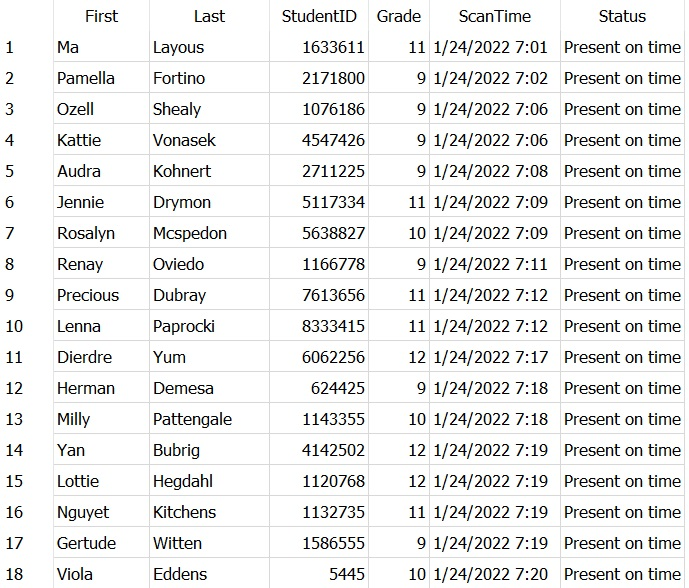

***periodAtt***:  The ***periodAtt*** table contains records of all period attendance for all classes during all periods.  A student who is marked absent for period attendance but did scan into the building on that day can be considered to have cut class.  This table includes all period attendance from 1-24-22 - 1-28-22.  It is sorted by teacher, courseSection, last, and first and includes the following fields:  date, first, last, studentID, courseSection, attendance, teacher, period, grade  
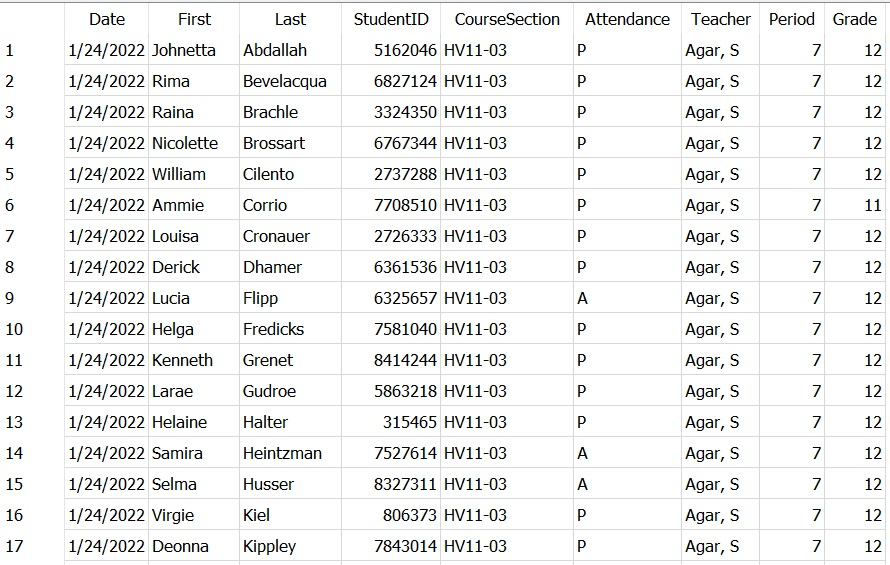

***bio***:  Table ***bio*** consists of records of all available parent phone numbers and emails for all students.  This table is current as of 1-28-22.  It is sorted by last and first and includes the following fields:  studentID, first, last, parent1Phone, parent2Phone, parentEmail  
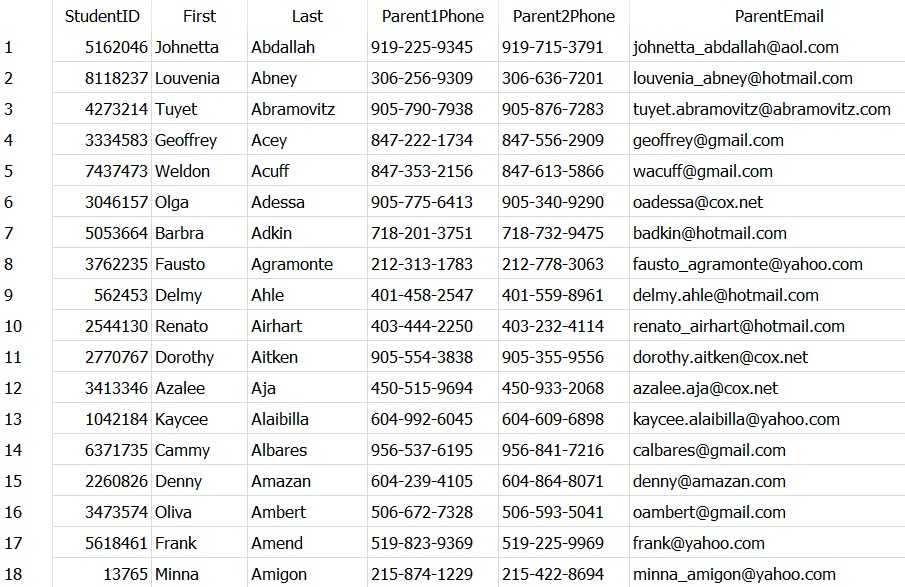

If our principal wants us to retrieve the list of all students in the week of 1-24-22 who scanned in late, we can do that.  We run a SELECT query on the scan table using a WHERE clause to retrieve only tardy students.  
Try it yourself!  It looks like there were 593 late scans that week!

In [ ]:
#Retrieve all records from scan where the student is tardy
sql_query_string = """
    SELECT * 
    FROM scan
    WHERE status='Tardy';
    
"""
 
#Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,First,Last,StudentID,Grade,ScanTime,Status
0,Timothy,Bussert,3756627,9,1/24/2022 8:10,Tardy
1,Georgiana,Colbath,4458257,9,1/24/2022 8:10,Tardy
2,Natalie,Fern,5580276,9,1/24/2022 8:10,Tardy
3,Shonda,Greenbush,8725277,10,1/24/2022 8:10,Tardy
4,Luisa,Harnish,1055540,12,1/24/2022 8:10,Tardy
...,...,...,...,...,...,...
588,Kimbery,Plikerd,5075222,10,1/28/2022 11:29,Tardy
589,Glory,Schieler,5171543,11,1/28/2022 11:56,Tardy
590,Jacquline,Libbey,7360125,12,1/28/2022 11:57,Tardy
591,Brittni,Gillaspie,2772578,11,1/28/2022 12:07,Tardy


Now it's time to do some outreach.  Uh oh!  Our phone numbers and email addresses are in the bio table.  How can we get the principal the contact information for each of the late scans?  It's time to try a JOIN!
We can connect tables in a normalized relational database using the JOIN keyword in SQL.  

You may first want to condider what key to use in the ***scan*** table for your join.  Ask yourself, "What field appears in both tables that links together my data?"  This field in the first table, ***scan***, can be considered a ***primary key***.  Now look for that same value in the second table, ***bio***, which can be considered a ***foreign key***.  Should we pick ***StudentID*** as our primary and foreign keys to join the tables?    

In [ ]:
#Retrieve all records from scan where the student is tardy
#Note that it is convention to use aliases for tables in joins:  scan AS s, bio AS b
#See also that the WHERE clause still goes at the bottom.  
sql_query_string = """
    SELECT * 
    FROM scan AS s
    LEFT JOIN bio AS b
    ON s.studentID=b.studentID
    WHERE status='Tardy'
"""
 
#Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,First,Last,StudentID,Grade,ScanTime,Status,StudentID,First,Last,Parent1Phone,Parent2Phone,ParentEmail
0,Timothy,Bussert,3756627,9,1/24/2022 8:10,Tardy,3756627,Timothy,Bussert,416-521-5624,416-250-5767,timothy@bussert.com
1,Georgiana,Colbath,4458257,9,1/24/2022 8:10,Tardy,4458257,Georgiana,Colbath,450-409-1254,450-825-8316,gcolbath@hotmail.com
2,Natalie,Fern,5580276,9,1/24/2022 8:10,Tardy,5580276,Natalie,Fern,307-704-8713,307-279-3793,natalie.fern@hotmail.com
3,Shonda,Greenbush,8725277,10,1/24/2022 8:10,Tardy,8725277,Shonda,Greenbush,973-482-2430,973-644-2974,shonda_greenbush@cox.net
4,Luisa,Harnish,1055540,12,1/24/2022 8:10,Tardy,1055540,Luisa,Harnish,604-399-1449,604-967-7334,lharnish@harnish.com
...,...,...,...,...,...,...,...,...,...,...,...,...
588,Kimbery,Plikerd,5075222,10,1/28/2022 11:29,Tardy,5075222,Kimbery,Plikerd,250-504-9388,250-654-7546,kimbery.plikerd@cox.net
589,Glory,Schieler,5171543,11,1/28/2022 11:56,Tardy,5171543,Glory,Schieler,325-869-2649,325-740-3778,glory@yahoo.com
590,Jacquline,Libbey,7360125,12,1/28/2022 11:57,Tardy,7360125,Jacquline,Libbey,418-682-7368,418-860-7541,jacquline@cox.net
591,Brittni,Gillaspie,2772578,11,1/28/2022 12:07,Tardy,2772578,Brittni,Gillaspie,208-709-1235,208-206-9848,bgillaspie@gillaspie.com


Hmmmm... That JOIN query did retrieve all records of tardy students with the phone numbers and email addresses, but there was considerble duplication.  Why?  Remember this:
```
SELECT *
```
This query is retrieving ***all*** fields in both tables, which includes those with duplicate information.  Let's SELECT only the fields we need.  Note the syntax that allows us to use aliases to select from the desired table:  

```

SELECT s.first, s.last, s.studentID, grade, scanTime, 
parent1Phone, parent2Phone, parentEmail
    FROM scan AS s
    LEFT JOIN bio AS b
    ON s.studentID=b.studentID
    WHERE status='Tardy'
```
Much better!  Now the next question is why we are choosing LEFT JOIN... What options exist for JOIN in SQL?

All images below were created for [W3Schools.com](http://www.w3schools.com):
###Inner Join###
This returns all records where there is a match. 
```
SELECT *
FROM scan as s
INNER JOIN bio as b
on s.studentID=b.studentID
```
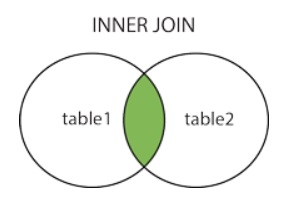


Isn't that exactly what we wanted?  Maybe... What if a student scanned in late for whom we had no biographical information?  Wouldn't our principal want to know about that student as well?  An INNER JOIN woud leave that student out.  

###Left Join###
This returns matching records.  In addition, it returns all records that appear in the left table that are not matched in the ON clause.  
```
    SELECT *
    FROM scan AS s
    LEFT JOIN bio AS b
    ON s.studentID=b.studentID
```

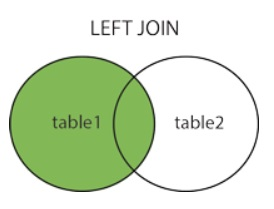

Perfect!  Now we know we have all late scans regardless of whether the school has biographical data on file for the student.  Just for the sake of argument, let's say the opposite were true...

###Right Join###
This returns all matching records and all other records in the right table even if they did not match.

```
SELECT *
FROM scan as s
RIGHT JOIN bio as b
on s.studentID=b.studentID
```

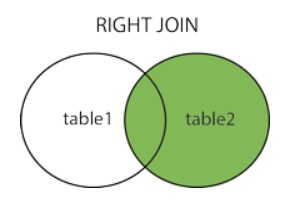

This might be helpful if wanted to display every single student with their biographical information regardless of whether they cut.  TIP:  It is rarely necessary to do a RIGHT JOIN.  Just consider the table whose records you want no matter what, and start with that table in a LEFT JOIN.

###Self Join###
You can do a JOIN of a table to the same table if desired.  Note that aliases must be used.  SELF JOIN can help you to emphasize relationships within a table.



##Beware the Cartessian Product!##
When you do a JOIN, think about the relationship between your primary key and your foreign key.  It is often ideal to have a ***one-to-one*** relationship; i.e., there is exactly one of the primary key in the first table and exactly one of the foreign key in the second table.  In our scan time to bio example, we had a ***many-to-one*** relationship; i.e., there were multiple student IDs in the scan table, but that ID only appeared once in the bio table.  The same is possible with a ***one-to-many*** relationship.  ***Many-to-Many*** relationships occur when the primary key appears multiple times in the first table and the foreign key appears multiple times in the second table.  Be very careful when doing joins with keys that appear more than once in a table because it is possible to retrieve records of distored data.  Try out this non-example that produces bad data with a ***many-to-many*** JOIN between scan and periodAtt.

In [ ]:
#NON-EXAMPLE:  103,573 rows
#This many-to-many join gives us bad data
#because of flawed logic.
#Understanding this mistake can help you avoid making it in your own queries.

sql_query_string = """
    SELECT *
    FROM scan AS s
    JOIN periodAtt AS p
    ON s.studentID=p.studentID
"""
 
#Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,First,Last,StudentID,Grade,ScanTime,Status,Date,First,Last,StudentID,CourseSection,Attendance,Teacher,Period,Grade
0,Ma,Layous,1633611,11,1/24/2022 7:01,Present on time,1/24/2022,Ma,Layous,1633611.0,AN1X-02,P,"Korczynski, J",6,11
1,Ma,Layous,1633611,11,1/24/2022 7:01,Present on time,1/24/2022,Ma,Layous,1633611.0,EE85-01,P,"Julye, G",3,11
2,Ma,Layous,1633611,11,1/24/2022 7:01,Present on time,1/24/2022,Ma,Layous,1633611.0,FS65-04,P,"Ploszaj, Z",9,11
3,Ma,Layous,1633611,11,1/24/2022 7:01,Present on time,1/24/2022,Ma,Layous,1633611.0,HU21-03,P,"Aguele, C",8,11
4,Ma,Layous,1633611,11,1/24/2022 7:01,Present on time,1/24/2022,Ma,Layous,1633611.0,MR21-01,P,"Boudrie, P",1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103573,Dona,Larner,6265552,11,1/28/2022 13:40,Tardy,1/25/2022,Dona,Larner,6265552.0,HU1X-01,A,"Aguele, C",2,11
103574,Dona,Larner,6265552,11,1/28/2022 13:40,Tardy,1/25/2022,Dona,Larner,6265552.0,SE21-01,A,"Scotland, I",4,11
103575,Dona,Larner,6265552,11,1/28/2022 13:40,Tardy,1/25/2022,Dona,Larner,6265552.0,UU5X-01,A,"Sidhu, R",3,11
103576,Dona,Larner,6265552,11,1/28/2022 13:40,Tardy,1/25/2022,Dona,Larner,6265552.0,UW21-01,A,"Sidhu, R",8,11


##Homework and Async. Work##
Please note that all students will complete the **same one required homework assignment**.  Students will also complete ***one or more*** of the asynchronous assignments of their choice.  There are five asynchronous assignments at varying difficulty levels.  




##Homework##
***Homework Assignment:***  Write a SQL query that retrieves the following records:  https://drive.google.com/file/d/1Vy6VDlqOZy8aV7zceGFSJNbbpFH06z1G/view?usp=sharing

>Your SQL JOIN query will retrieve from the tables shared with you the records of all of the unexcused period attendance absences in the school for the week of  1-24-22 sorted by student last name ascending.  You will use the resulting table of results, which you can call allCuts, in the async assignment.  Consider a cut to be any instance of a student scanning into the building and being marked absent in a class.  You will retrieve only the first name, last name, student ID, grade, scanTime, status, date, courseSection, attendance, period, and teacher.

***Skills Learned***:  SELECT, JOIN, ORDER BY, aliases, intro. to SQL Functions

***Hint #1***:  You want to do an inner join on the periodAtt table and the scan table, but you have no unique primary key and foreign key to join on.  Would it be possible to join on both the studentID and the date?  The syntax might look like this:  
```
SELECT * 
FROM table1 AS t1 
INNER JOIN table2 AS t2 
ON t1.studentID=t2.studentID AND t1.date=t2.date
```

***Hint #2***:  Before you can make the inner join work on the studentID and date, you need to update the date in one table or the other so that the formats match.  How can we modify the date programmatically within a query?  substr() can extract a string from the first character to first instance of the ' ' character, and instr() can return the position of the first occurrence of ' '.  Could these two be used together to create a new date field?  The syntax might look like this:  
```
substr(myField, 1, instr(myField,' ')) 
```

***Hint #3***:  Now we are ready to retrieve only the relevant fields for our records.  Some of the fields will exist in both tables, so you will need to specify what table the field is coming from if it shares a name with one in the other table.  This is done with the following syntax:  
```
SELECT myTable1.myField1, myTable2.myField2... 
```
It is necessary to write this query that returns the records for the allCuts table prior to completing the asynchronous work as most of the asynchronous assignments use the allCuts table.




##Homework Workspace##
Test your query below.  Save your query in your repository when you are done.  It may be helpful to look closely at the structure of the tables:  [scan](https://drive.google.com/file/d/198mq2U5ST2xVpRQkPVGHVfNYaL9vZWb9/view?usp=sharing), [periodAttendance](https://drive.google.com/file/d/1HVGwnF5SvxFZnZ5TA0Y0Gtnel5VG2y4M/view?usp=sharing), and [bio](https://drive.google.com/file/d/161MFxGKdJCQQzc2-92uRSxUZIe_Hhji-/view?usp=sharing).

In [ ]:
#Practice your homework query here.
#Please save it to your repository.
#It is necessary to complete the homework before the asynchronous work.

sql_query_string = """

--Type your homework query below


"""
 
#Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

,First,Last,StudentID,Grade,ScanTime,Status
0,Ma,Layous,1633611,11,1/24/2022 7:01,Present on time
1,Pamella,Fortino,2171800,9,1/24/2022 7:02,Present on time
2,Ozell,Shealy,1076186,9,1/24/2022 7:06,Present on time
3,Kattie,Vonasek,4547426,9,1/24/2022 7:06,Present on time
4,Audra,Kohnert,2711225,9,1/24/2022 7:08,Present on time
...,...,...,...,...,...,...
3365,Kimbery,Plikerd,5075222,10,1/28/2022 11:29,Tardy
3366,Glory,Schieler,5171543,11,1/28/2022 11:56,Tardy
3367,Jacquline,Libbey,7360125,12,1/28/2022 11:57,Tardy
3368,Brittni,Gillaspie,2772578,11,1/28/2022 12:07,Tardy


##Asynchronous##
***Asynchronous Assignments***:  Each student will complete one or more asychrounous assignments.  These are of varying difficulty with hints.  See below:
Create and post in the Slack at least one query from the challenge list below.  
***SQL Challenge 1)  Intermediate*** - Write a SQL Query that retrieves the following records:  https://drive.google.com/file/d/1kbkE8PFhoTU2ggG6zg1O3iOYoIk4w7Zh/view?usp=sharing  Write a query using the allCuts table to retrieve the list of all teachers whose classes are cut most often.
Skills Learned:  SELECT, GROUP BY, ORDER BY, aggregate functions, nested tables, calculated fields
Hint #1:  You will be using a nested query.  The inner query retrieves the allCuts table, which will be surrounded by parentheses, and you will be selecting from this table.  Use the following syntax:  
```
SELECT * FROM ( Enter the full text of your allCuts query here. ) AS allCuts
```
Hint #2:  When you group by a field, every field in your returned table must be either that field or the result of an aggregate function.  For example, if you grouped by teacher, you could use the line 
```
SELECT teacher, COUNT(*) AS total FROM…
```
Hint #3:  Recall that GROUP BY must appear below the query that retrieves that allCuts table.

OR

***SQL Challenge 2)  Easy*** - Write a SQL Query that retrieves the following records:   https://drive.google.com/file/d/1hvChuoJ3_IbeP9j93Q2g82hfQSdkfcdr/view?usp=sharing  Use the allCuts table and the biographical table to retrieve a list of student cuts with outreach information with no duplication of fields.
Skills Learned:  SELECT, LEFT JOIN, nested tables, ORDER BY
Hint #1:  You will be using a nested query.  The inner query retrieves the allCuts table, which will be surrounded by parentheses, and you will be selecting from this table.  Use the following syntax:  
```
SELECT * FROM ( Enter the full text of your allCuts query here. ) AS allCuts
``` 
Hint #2:  This is going to be a LEFT JOIN of the allCuts table and the biographical table because you want to include all students regardless of whether contact information is available for them in the biographical table.  This LEFT JOIN is much easier than the allCuts INNER JOIN because the primary key and foreign key already exist as unique identifiers in the two tables.
Hint #3:  If you are retrieving a field that is named in both tables, you will need to indicate which version you are taking using syntax like this:  
```
a.StudentID
```

OR

SQL Challenge 3) Difficult - Write a SQL Query that retrieves the following records:  https://drive.google.com/file/d/1hc5zdLhfIkK2KN9aMMwtkwVUIeEegexH/view?usp=sharing  Write a query using the allCuts table to retrieve the list of sections of math that are cut most often from greatest to least including courseSection, teacher, and totalCuts among teachers Siena, Jarding, Rael, Oto, Klar, and Pylant
Skills Learned:  SELECT, GROUP BY, HAVING, nested tables, logical operators, ORDER BY, IN()
Hint #1:  You will be using a nested query.  The inner query retrieves the allCuts table, which will be surrounded by parentheses, and you will be selecting from this table.  Use the following syntax:  
```
SELECT * FROM ( Enter the full text of your allCuts query here. ) AS allCuts 
```
Hint #2:  This will include GROUP BY, but you want to find a way to use only math classes.  Note that keyword HAVING is used with GROUP BY instead of WHERE.  
Hint #3:  You can use the SQL IN() function to ensure that one of the fields includes only values in a list.  If you run into issues with syntax, it is sometimes helpful to use another level of nesting; i.e., 
```
SELECT * FROM (SELECT * FROM( SELECT * FROM myTable) AS myTable2) AS myTable3  
```
This can take care of issues with using aggregate functions on your table and also using non-aggregate functions with the same data.   

OR

***SQL Challenge 4)  Quite Difficult*** - Write a SQL Query that retrieves the following records:  https://drive.google.com/file/d/1cx3ltV-CX3FuTn66SQEjKi2I_NWp4DDN/view?usp=sharing  Write a query using the allCuts table to retrieve a table listing every student with at least one cut and the number of times that student has cut class for each period of the day and the total number of cuts sorted by student last name.  
Skills Learned:  SELECT, GROUP BY, HAVING, nested tables, IIF(), aggregate functions, calculated fields, aliasing
Hint #1:  You will be using a nested query.  The inner query retrieves the allCuts table, which will be surrounded by parentheses, and you will be selecting from this table.  Use the following syntax:  
```
SELECT * 
FROM ( Enter the full text of your allCuts query here. ) AS allCuts 
```
Hint #2:  You do not need to check for at least one cut because your allCuts table already provides this.  You can try to solve this one by creating calculated fields, which are made with one or more functions and given a name with an alias.  IIF(condition, valueIfTrue, valueIfFalse) is a powerful SQL function that can be used as a calculated field to return values contingent upon table data.  For instance, 
```
IIF(period='1', period, 0) AS Pd1 
```
would create a field Pd1 that is populated by the number of period 1 cuts for that student. 
Hint #3:  This is starting to come together, but now we want to normalize the data so that each student is on a single line.  Let's make a nested table so that we can use our aggregate functions on our existing data set.  What aggregate functions would be most useful here?  If we GROUP BY StudentID, Last, First, we can use 
```
MAX(Pd1) AS Pd1_
```
to get the highest period 1 cuts on all rows, which would be the first period cuts for that student.  The same works for Pd2_ and so on.  To get the total, we can all together the values of all periods.  

OR  

***SQL Challenge 5)  Coder’s Choice -*** Create any query that would retrieve data you believe a school administration may find to be useful in advancing student learning.


##Asynchronous Workspace##
Test your queries below.  Post your queries on the Slack when you are done.  It may be helpful to look closely at the structure of the tables:  [scan](https://drive.google.com/file/d/198mq2U5ST2xVpRQkPVGHVfNYaL9vZWb9/view?usp=sharing), [periodAttendance](https://drive.google.com/file/d/1HVGwnF5SvxFZnZ5TA0Y0Gtnel5VG2y4M/view?usp=sharing), and [bio](https://drive.google.com/file/d/161MFxGKdJCQQzc2-92uRSxUZIe_Hhji-/view?usp=sharing).

In [ ]:
#Practice your asynchronous queries here.
#Note that you will need to complete the homework assignment first.
#Please post asynch. queries on the Slack when you are done.

sql_query_string = """

--Type your asynch. queries below one at a time.
SELECT *, IIF(First='Bill', 'Your Name is Bill.', 'Your name is not Bill.') AS BillCheck
FROM bio
"""
 
#Exectue the SQL query
result_df = sql_query_to_pd(sql_query_string, db_name='default.db')
result_df

OperationalError: ignored